In [2]:
import pandas as pd
import datetime as dt

In [2]:
position_history = pd.read_csv('/home/lukas/deeptech_ai/data/TRUMPF_Indoor_Logistik_Dataset/position_history_new_starts_at_01.07.2018.tsv', delimiter='\t')
items = pd.read_csv('/home/lukas/deeptech_ai/data/TRUMPF_Indoor_Logistik_Dataset/items.tsv', delimiter='\t', engine='python')
items_history = pd.read_csv('/home/lukas/deeptech_ai/data/TRUMPF_Indoor_Logistik_Dataset/itemshistory.tsv', delimiter='\t', engine='python')
del items_history['id']
areas = pd.read_csv('/home/lukas/deeptech_ai/data/TRUMPF_Indoor_Logistik_Dataset/areas.tsv', delimiter='\t', engine='python')

In [3]:
position_history['timestamp'] = position_history[['timestamp']].apply(lambda x: dt.datetime.fromtimestamp(x['timestamp']/1000), axis=1)
items['timestamp'] = items.apply(lambda x: dt.datetime.fromtimestamp(x['timestamp']/1000), axis=1)
items_history['timestamp'] = items_history.apply(lambda x: dt.datetime.fromtimestamp(x['timestamp']/1000), axis=1)

position_history['timestamp'] = pd.to_datetime(position_history['timestamp'])
items['timestamp'] = pd.to_datetime(items['timestamp'])
items_history['timestamp'] = pd.to_datetime(items_history['timestamp'])

position_history['date'] = position_history.apply(lambda x: x['timestamp'].date(), axis=1)

In [4]:
position_history['y'] = position_history['y'] * -1

In [5]:
Xmin = -62.5
Xmax = 53.6
Ymax = 67.5
Ymin = -14.325

position_history = position_history[(position_history['x'] > Xmin) & (position_history['x'] < Xmax) & (position_history['y'] > Ymin) & (position_history['y'] < Ymax)]

In [6]:
items_all = items.append(other=items_history)
items_all['date'] = items.apply(lambda x: x['timestamp'].date(), axis=1)
items_all = items_all[items_all['date']>dt.date(2018,7,1)]
items_all.reset_index(drop=True, inplace=True)
items_all['timestamp_approx'] = items_all.apply(lambda x: x['timestamp'].replace(microsecond=0), axis=1)

In [7]:
position_history['timestamp_approx'] = position_history.apply(lambda x: x['timestamp'].replace(microsecond=0), axis=1)

In [8]:
items[items['address']==-5655706921459459053]

,itemId,timestamp,address,parentItemId
7,F7344433,2018-07-17 07:48:22.157,-5655706921459459053,-1
71,F7518669,2018-06-12 23:31:12.459,-5655706921459459053,-1
157,P7688342,2018-10-10 20:26:51.047,-5655706921459459053,-1


## Start_End_Process

In [5]:
import matplotlib.pyplot as plt
position_history = pd.read_csv('/home/lukas/deeptech_ai/data/df10s.csv')
position_history = find_cycles(position_history)

In [4]:
def find_cycles(position_history):

    # config: window for cycle start/ end
    x_start_low = 5
    x_start_up = 15
    y_start_low = -2
    y_start_up = 5


    position_history['in_area'] = ((position_history['x']>x_start_low) & (position_history['x']<x_start_up) & (position_history['y']>y_start_low) & (position_history['y']<y_start_up))
    position_history.sort_values(by=['address','timestamp'], ascending=True, inplace=True)
    position_history.reset_index(drop=True, inplace=True)
    position_history['in_area_before'] = position_history[['in_area']].shift(1)
    position_history['cycle_start'] = (position_history['in_area_before']==True) & (position_history['in_area']==False)
    position_history['cycle_end'] = (position_history['in_area_before']==False) & (position_history['in_area']==True)

    position_history['cycle_no']=None
    last_col = len(position_history.columns)-1
    process_no=0
    started=False
    for i in range(len(position_history)):
        if started == True:
            position_history.iat[i,last_col]=process_no
        if position_history['cycle_start'][i]:
            started = True
            process_no = process_no + 1
            position_history.iat[i,last_col]=process_no
        if position_history['cycle_end'][i]:
            started = False
    
    
    position_history.groupby('cycle_no').count()['address']
    
    return position_history

/home/lukas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':


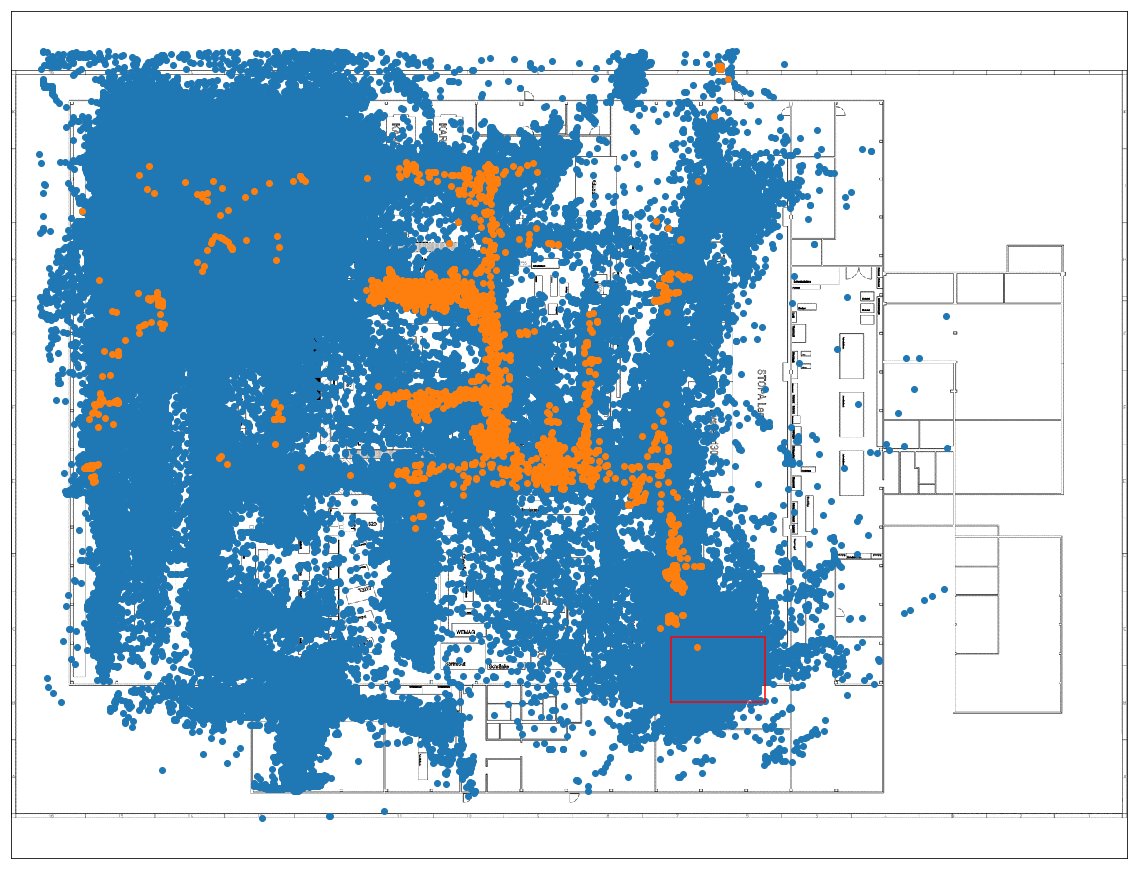

In [20]:
from scipy.misc import imread
import numpy as np
plt.rcParams["figure.figsize"] = (20,20)

start_area = np.array([[5,-2],[5,5],[15,5],[15,-2],[5,-2]])                    
                       
plt.plot(start_area[:, 0], start_area[:, 1], color='red')


one_cycle = position_history[position_history['cycle_no']==3758]
cycle_two = position_history[position_history['cycle_no']==4667]
img = imread("ShopFloorLayout.png")
plt.imshow(img,zorder=0,extent=[-65.5, 53.6, -14.325, 65.5])
plt.xticks([])
plt.yticks([])
plt.scatter(one_cycle.x, one_cycle.y)
plt.scatter(cycle_two.x, cycle_two.y)

/home/lukas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
/home/lukas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


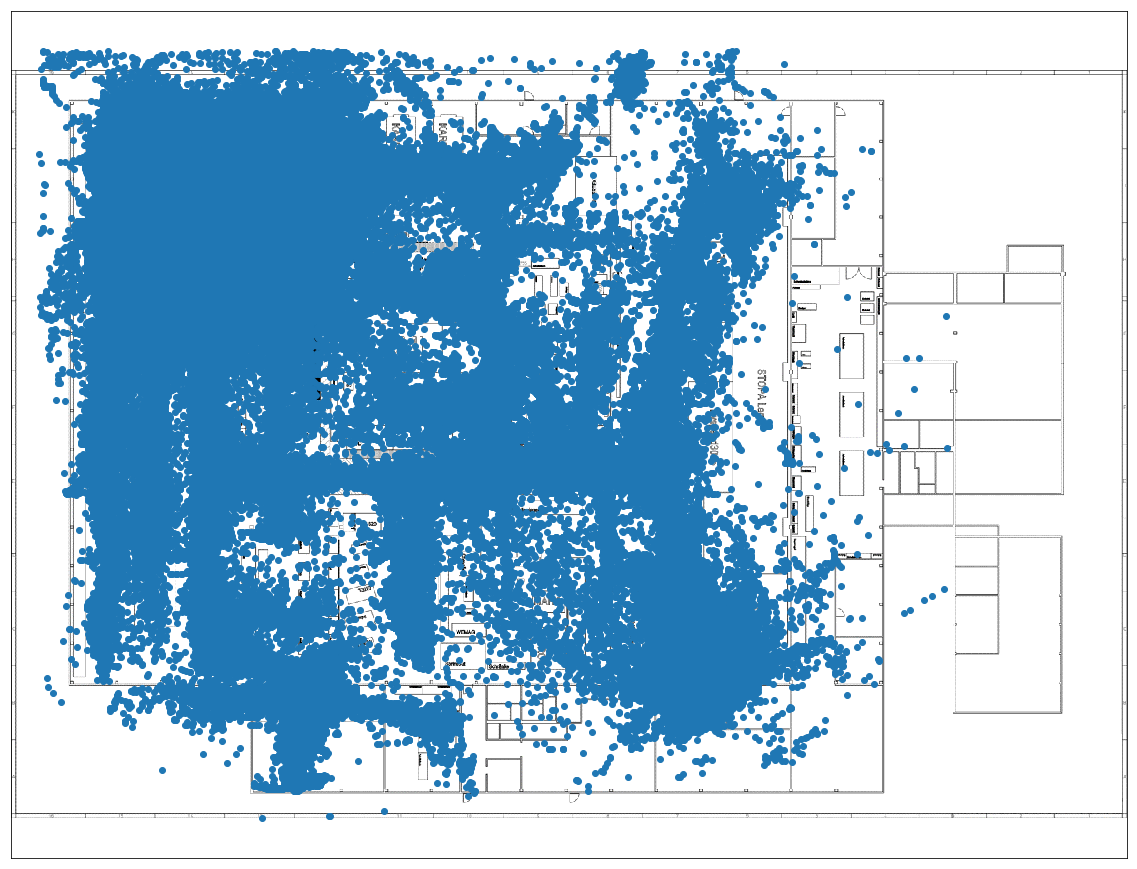

In [22]:
from scipy.misc import imread
import numpy as np
plt.rcParams["figure.figsize"] = (20,20)

img = imread("ShopFloorLayout.png")
plt.imshow(img,zorder=0,extent=[-65.5, 53.6, -14.325, 65.5])

one_cycle = position_history
img = imread("ShopFloorLayout.png")
plt.xticks([])
plt.yticks([])
plt.scatter(one_cycle.x, one_cycle.y)

/home/lukas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
/home/lukas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


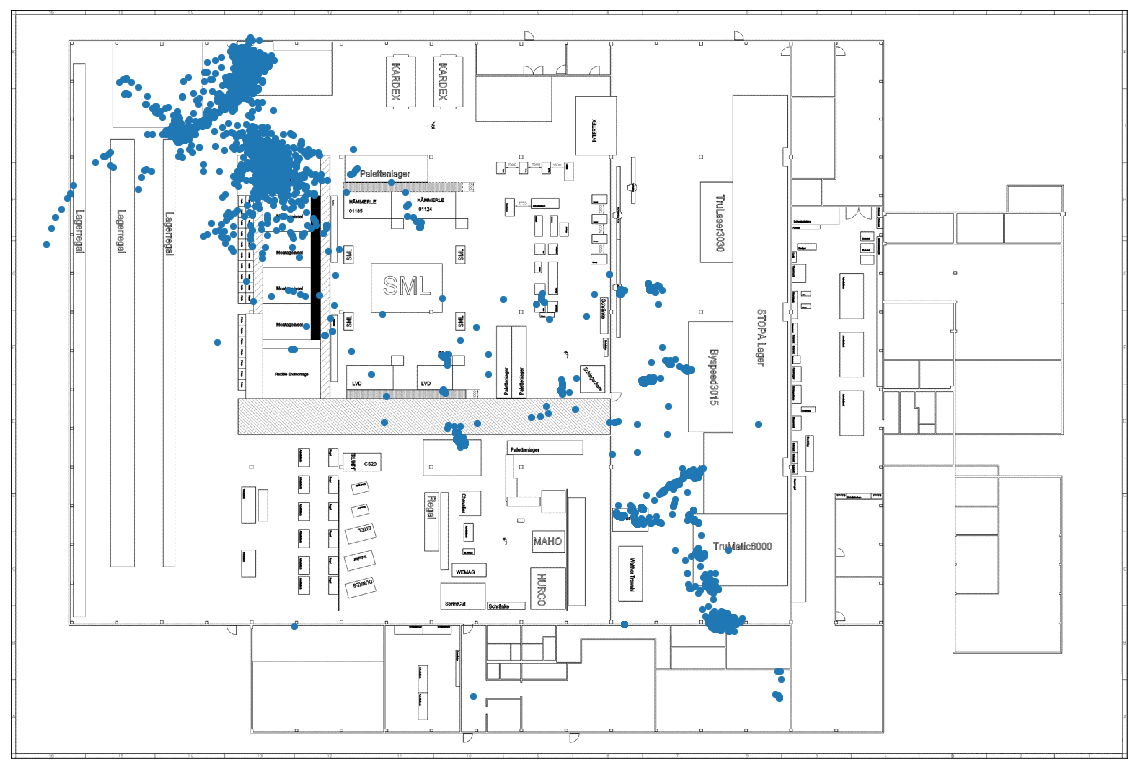

In [24]:
from scipy.misc import imread
import numpy as np
plt.rcParams["figure.figsize"] = (20,20)

img = imread("ShopFloorLayout.png")
plt.imshow(img,zorder=0,extent=[-65.5, 53.6, -14.325, 65.5])

one_cycle = position_history[position_history['address']==9096423301671818677]
img = imread("ShopFloorLayout.png")
plt.xticks([])
plt.yticks([])
plt.scatter(one_cycle.x, one_cycle.y)

In [23]:
position_history.cycle_no.value_counts()[40:]
position_history[position_history['cycle_no']==5532]

,address,timestamp,x,y,in_area,in_area_before,cycle_start,cycle_end,cycle_no
1357944,9096423301671818677,2018-09-06 10:00:40,8.6,5.3,False,True,True,False,5532
1357945,9096423301671818677,2018-09-06 10:00:50,8.5,7.3,False,False,False,False,5532
1357946,9096423301671818677,2018-09-06 10:01:00,8.5,7.4,False,False,False,False,5532
1357947,9096423301671818677,2018-09-06 10:01:40,8.4,7.4,False,False,False,False,5532
1357948,9096423301671818677,2018-09-06 10:04:10,7.8,7.9,False,False,False,False,5532
1357949,9096423301671818677,2018-09-06 10:04:20,7.8,7.9,False,False,False,False,5532
1357950,9096423301671818677,2018-09-06 10:04:30,7.8,7.9,False,False,False,False,5532
1357951,9096423301671818677,2018-09-06 10:04:50,7.8,7.9,False,False,False,False,5532
1357952,9096423301671818677,2018-09-06 10:05:00,7.7,7.9,False,False,False,False,5532
1357953,9096423301671818677,2018-09-06 10:05:20,7.7,7.9,False,False,False,False,5532


In [247]:
position_history[(position_history['address']==145401774635637016)&(position_history['cycle_no']==18)]
#position_history[position_history['cycle_no']==583]

,address,timestamp,x,y,in_area,in_area_before,cycle_start,cycle_end,cycle_no
19215,145401774635637016,2018-08-29 11:51:10,7.8,7.8,False,True,True,False,18
19216,145401774635637016,2018-08-29 11:54:30,7.9,7.8,False,False,False,False,18
19217,145401774635637016,2018-08-29 11:54:40,7.9,7.7,False,False,False,False,18
19218,145401774635637016,2018-08-29 11:55:00,7.9,7.5,False,False,False,False,18
19219,145401774635637016,2018-08-29 11:55:10,7.9,7.5,False,False,False,False,18
19220,145401774635637016,2018-08-29 11:55:20,7.9,7.5,False,False,False,False,18
19221,145401774635637016,2018-08-29 11:55:50,7.9,7.5,False,False,False,False,18
19222,145401774635637016,2018-08-29 11:56:10,7.9,7.5,False,False,False,False,18
19223,145401774635637016,2018-08-29 12:03:40,8.0,7.4,False,False,False,False,18
19224,145401774635637016,2018-08-29 12:04:00,8.0,7.4,False,False,False,False,18


## DBSCAN

In [12]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [13]:
addr = -5655706921459459053

80

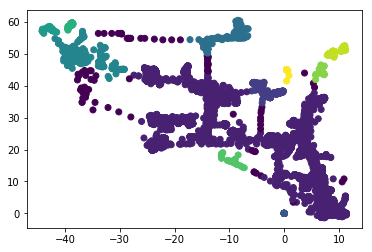

In [14]:
temp = position_history[position_history['address']==addr][['x','y']]
temp = temp.iloc[0:50000,:]
scaled = StandardScaler().fit_tposition_history['address']==145401774635637016)ransform(temp)
db = DBSCAN(eps=0.1, min_samples=10)
db.fit(scaled)
plt.scatter(temp.x, temp.y, c=db.labels_)
len(db.labels_[db.labels_==-1])

In [ ]:
#def plot_cluster(df, address=-359037136983245745):
    temp = df.loc[df.address == address, ['x', 'y']]
    scaled = StandardScaler().fit_transform(temp)
    db = DBSCAN(eps=0.3, min_samples=10).fit(scaled)
    plt.scatter(temp.x, temp.y, c=db.labels_)

In [ ]:
addr = -359037136983245745
temp = position_history[position_history['address']==addr][['x', 'y']]
scaled = StandardScaler().fit_transform(temp)
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(scaled)
plt.scatter(temp['x'], temp['y'], c=db.labels_)

In [ ]:
plot_cluster(test)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
one_day = position_history[(position_history['date']>dt.date(2018,9,2))&(position_history['date']<dt.date(2018,9,4))]
lof = LocalOutlierFactor(n_neighbors=20)
a = lof.fit_predict(one_day[['x','y']])
plt.scatter(one_day.x, one_day.y, c=a)

In [ ]:
len(one_day)

In [ ]:
plt.scatter(one_day.x, one_day.y, c=a)

In [ ]:
type(position_history['timestamp'][0])